# Download Required Packages

In [280]:
%%capture
%pip install numpy
%pip install matplotlib
%pip install pandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parse Dataset

In [284]:
data = np.genfromtxt('./Housing.csv', delimiter=',', dtype='longlong', encoding='utf-8')
data = np.delete(data, 0, 0)
print(data)

[[13300000     7420        4 ...        2       -1       -1]
 [12250000     8960        4 ...        3       -1       -1]
 [12250000     9960        3 ...        2       -1       -1]
 ...
 [ 1750000     3620        2 ...        0       -1       -1]
 [ 1750000     2910        3 ...        0       -1       -1]
 [ 1750000     3850        3 ...        0       -1       -1]]


# Plot Sqft Area vs Price

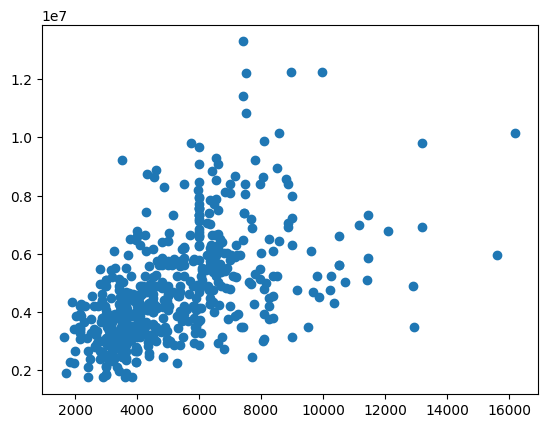

In [ ]:
plt.scatter(data[:, 1], data[:, 0])

# Run 2D Gradient Descent Algo

[0/20]: x0 = 0.02366117362246754 x1=132.87607821158392


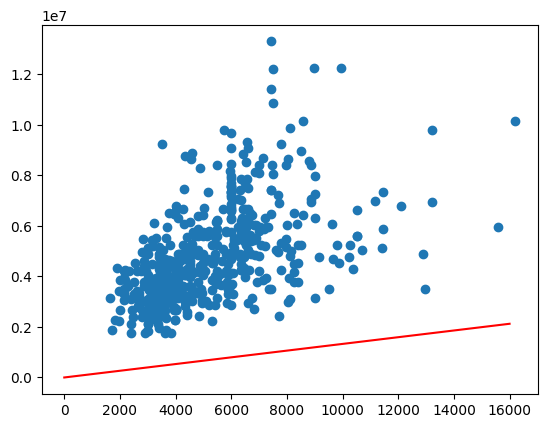

[1/20]: x0 = 0.04392656672200759 x1=244.95111372646087


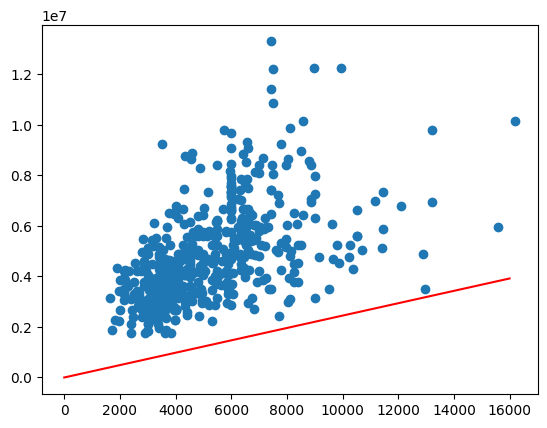

[2/20]: x0 = 0.061327770660953906 x1=339.48139903930377


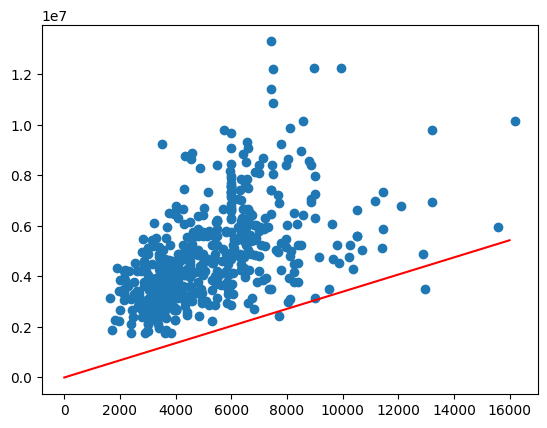

[3/20]: x0 = 0.076313159003925 x1=419.21347139042416


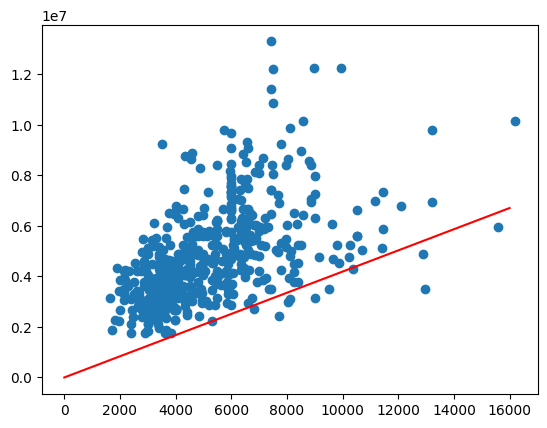

[4/20]: x0 = 0.08926091482102606 x1=486.46391223703125


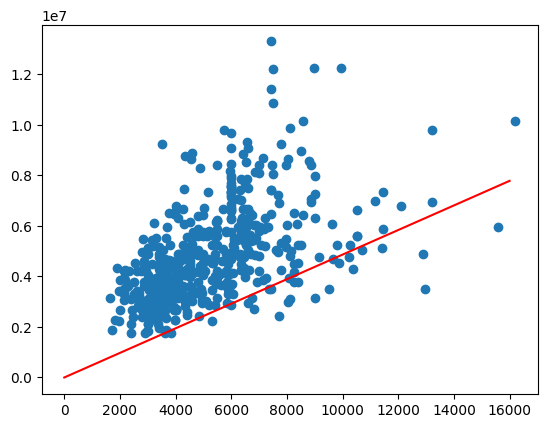

[5/20]: x0 = 0.10049001863608804 x1=543.1866545421043


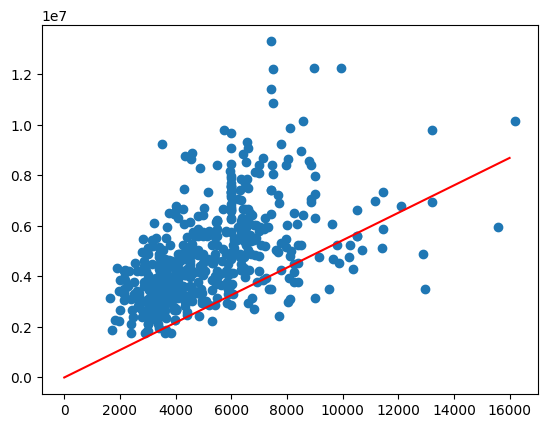

[6/20]: x0 = 0.11026951627010849 x1=591.0297534655133


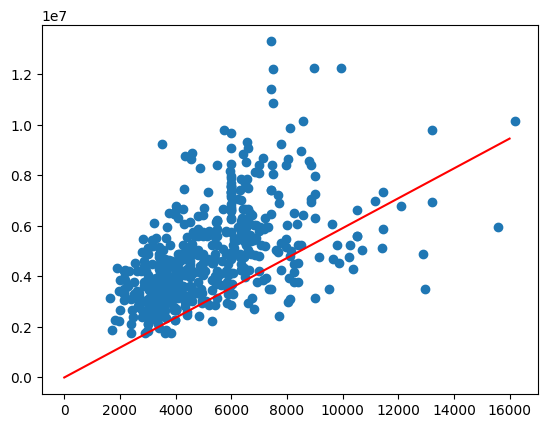

[7/20]: x0 = 0.11882633585313943 x1=631.3832699056799


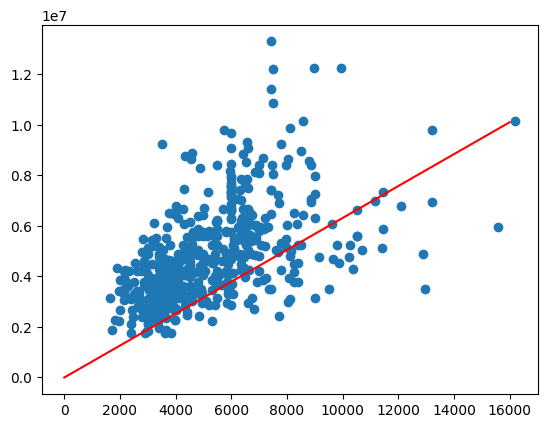

[8/20]: x0 = 0.12635188112458112 x1=665.4196581277093


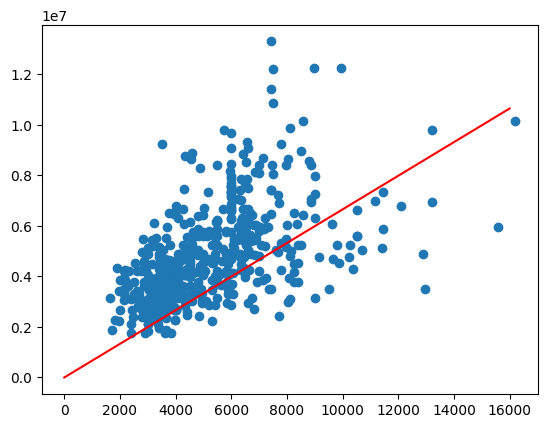

[9/20]: x0 = 0.13300759258741643 x1=694.1278309233572


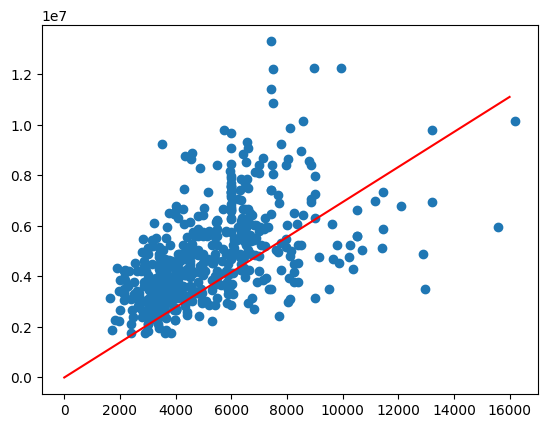

[10/20]: x0 = 0.1389296380933537 x1=718.3418920515509


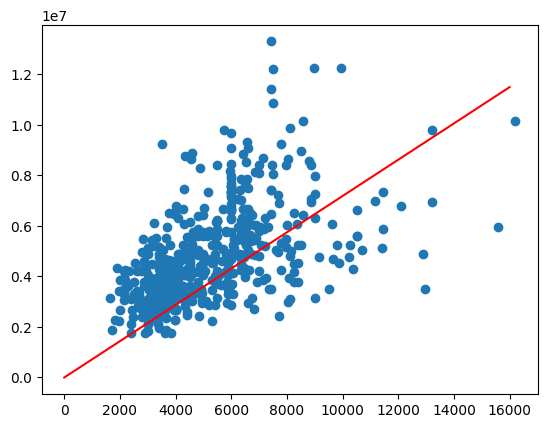

[11/20]: x0 = 0.14423286914184064 x1=738.7653707683164


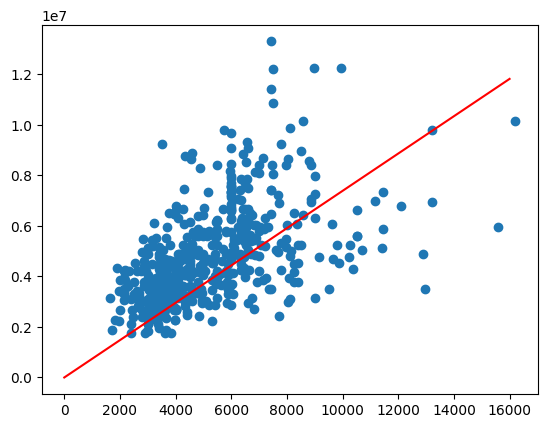

[12/20]: x0 = 0.1490141578415262 x1=755.991662570059


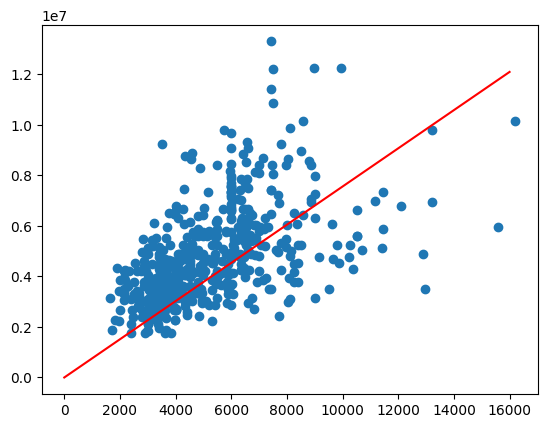

[13/20]: x0 = 0.15335521148817305 x1=770.5212700473085


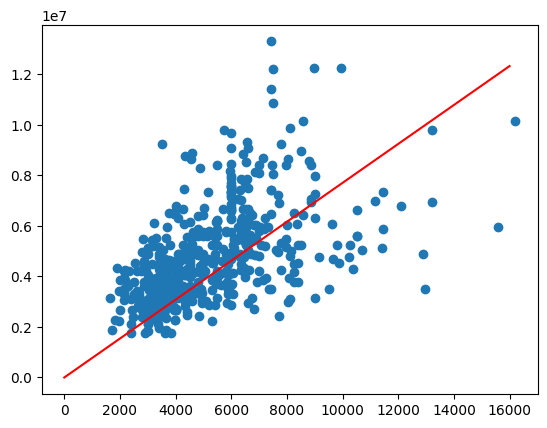

[14/20]: x0 = 0.15732494653538126 x1=782.7763447745991


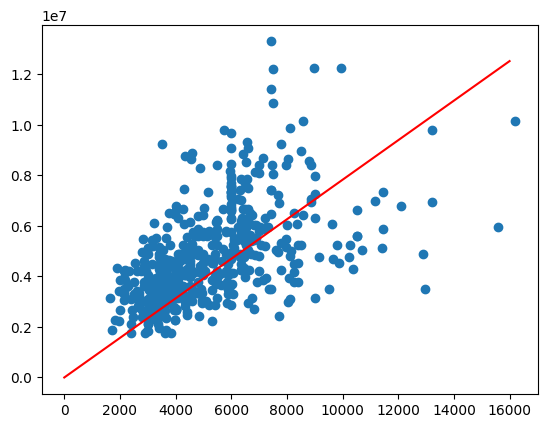

[15/20]: x0 = 0.16098149093283337 x1=793.1129527448995


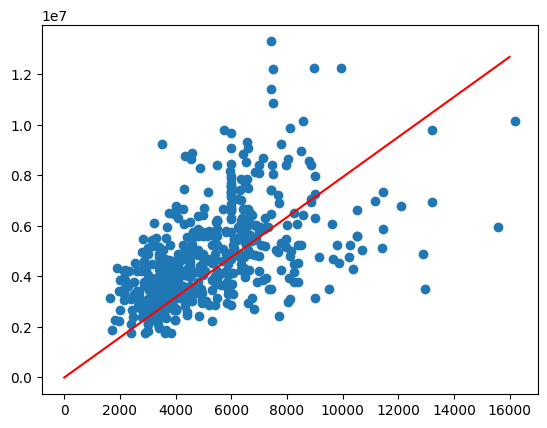

[16/20]: x0 = 0.16437387300914838 x1=801.8314197155822


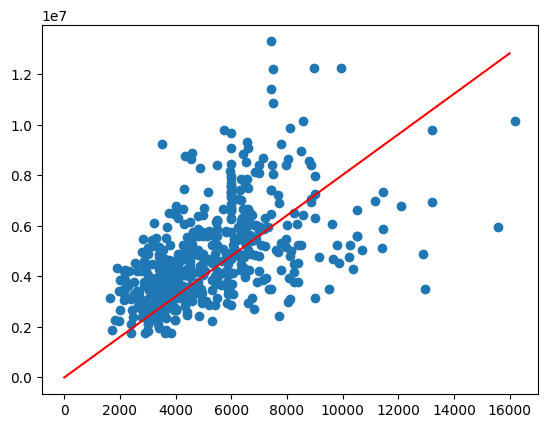

[17/20]: x0 = 0.16754344596911344 x1=809.1850570455675


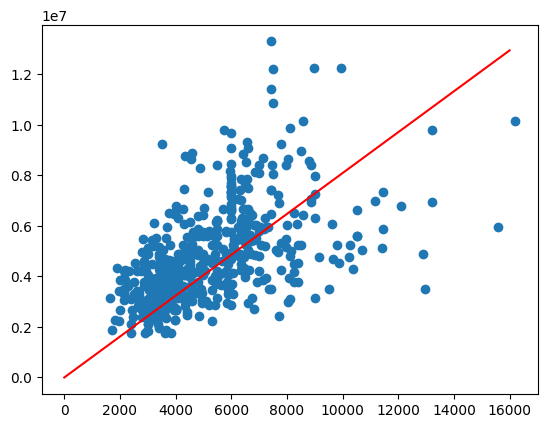

[18/20]: x0 = 0.1705250893934612 x1=815.3875215490942


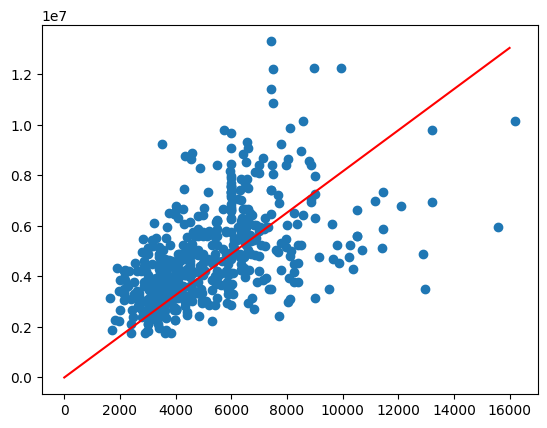

[19/20]: x0 = 0.1733482226502501 x1=820.619023203593


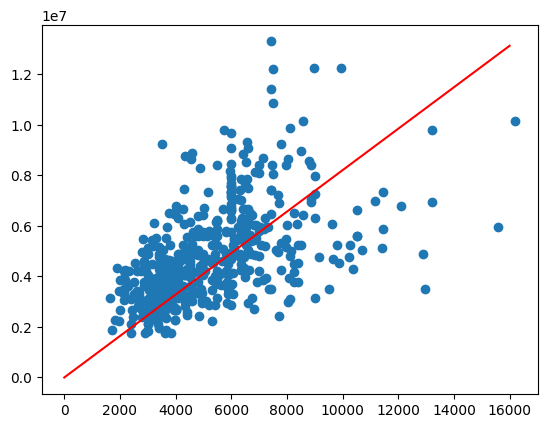

array([[1.73348223e-01],
       [8.20619023e+02]])

In [282]:
placeholder_x = np.arange(16000)

def sgd(data, training_rate=0.00000000001, iters=20):
    theta = np.array([[0],[0]])
    X = data[:, [1]]
    X_1 = np.ones(X.shape, dtype=X.dtype)
    X = np.hstack((X_1, X))
    Y = data[:, [0]].T[0]

    for _ in range(iters):
        for x, y in zip(X, Y):
            h_x = np.matmul(theta.T, x)
            x = np.reshape(x, theta.shape)
            theta = theta - training_rate * (h_x - y) * x

        print(f'[{_}/{iters}]: x0 = {theta[0,0]} x1={theta[1,0]}')
        # plot charts
        plt.scatter(data[:, 1], data[:, 0])
        plt.plot(placeholder_x, theta[1,0]*placeholder_x + theta[0,0], color='red')
        plt.show()

    return theta


sgd(data)
